In [1]:
import os
import sys
import yfinance as yf
import talib as ta 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px




- Load Data

In [2]:
# stock data combined 
combined_stock= pd.read_csv('../data/raw/combined_stock.csv')
df_sorted = combined_stock.sort_values(by=['Stock', 'Date'])
print(df_sorted.shape)


(45428, 3)


In [17]:
df_sorted.head()

,Date,Close,Stock
14692,1980-12-12,0.128348,AAPL
14693,1980-12-15,0.121652,AAPL
14694,1980-12-16,0.112723,AAPL
14695,1980-12-17,0.115513,AAPL
14696,1980-12-18,0.118862,AAPL


In [3]:
# sentiment score 
df_sentiment = pd.read_csv('../data/raw/average_sentiment.csv')
print(df_sentiment.shape)
df_sentiment.head()

(1975, 3)


,Date,stock,sentiment
0,2020-03-09,AAPL,-0.155556
1,2020-03-10,AAPL,0.021708
2,2020-03-11,AAPL,0.018624
3,2020-03-12,AAPL,-0.083048
4,2020-03-13,AAPL,0.069215


- Merge stock and sentiment data

In [4]:
# Merge the two DataFrames
merged_df = pd.merge(df_sentiment, df_sorted, left_on=['Date', 'stock'], right_on=['Date', 'Stock'], how='inner')

# Drop the extra 'Stock' column
merged_df.drop(columns=['Stock'], inplace=True)

print(merged_df.shape)



(1796, 4)


In [19]:
merged_df.head()

,Date,stock,sentiment,Close
1791,2020-05-28,TSLA,0.100000,53.720669
1792,2020-05-29,TSLA,0.125000,55.666668
1793,2020-06-01,TSLA,0.077917,59.873333
1794,2020-06-02,TSLA,0.161147,58.770668
1795,2020-06-10,TSLA,0.037515,68.336670


- Calculate daily return

In [5]:
# Calculate daily returns for each stock
merged_df['Daily Returns'] = merged_df.groupby('stock')['Close'].pct_change()

In [23]:
merged_df.head()

,Date,stock,sentiment,Close,Daily Returns
0,2020-03-09,AAPL,-0.155556,66.542503,NaN
1,2020-03-10,AAPL,0.021708,71.334999,0.072022
2,2020-03-11,AAPL,0.018624,68.857498,-0.034731
3,2020-03-12,AAPL,-0.083048,62.057499,-0.098755
4,2020-03-13,AAPL,0.069215,69.492500,0.119808


In [24]:
merged_df.dtypes

Date              object
stock             object
sentiment        float64
Close            float64
Daily Returns    float64
dtype: object

In [25]:
# checking null values 
merged_df.isnull().sum()

Date             0
stock            0
sentiment        0
Close            0
Daily Returns    5
dtype: int64

In [26]:
# Display rows where Daily Returns is NaN
nan_returns = merged_df[merged_df['Daily Returns'].isnull()]
print(nan_returns)

            Date stock  sentiment       Close  Daily Returns
0     2020-03-09  AAPL  -0.155556   66.542503            NaN
61    2020-04-27  AMZN   0.100000  118.800003            NaN
89    2018-11-13  GOOG   0.000000   51.802502            NaN
441   2011-03-03  NVDA  -0.300000    0.521750            NaN
1566  2019-07-01  TSLA   0.079167   15.144667            NaN


In [27]:
# Get unique stocks using unique()
unique_stocks = merged_df['stock'].unique()
print("Unique stocks:", unique_stocks)

Unique stocks: ['AAPL' 'AMZN' 'GOOG' 'NVDA' 'TSLA']


- Correlation

In [6]:
# Corrlelation between sentiment 
correlation = merged_df['sentiment'].corr(merged_df['Close'])
print("Correlation between sentiment and close:", correlation)


Correlation between sentiment and close: -0.08949253138667704


In [7]:
correlation2 = merged_df['sentiment'].corr(merged_df['Daily Returns'])
print("Correlation between sentiment and daily stock returns:", correlation2)


Correlation between sentiment and daily stock returns: 0.08024903726438638


- Visualization

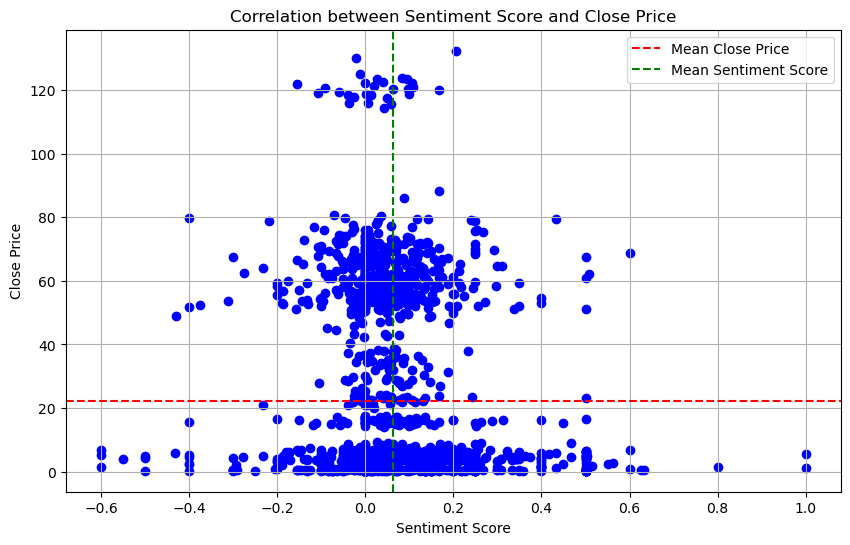

In [19]:
# Plotting
# Correlation between Sentiment Score and Close Price

plt.figure(figsize=(10, 6))
plt.scatter( merged_df['sentiment'], merged_df['Close'], color='blue')
plt.title('Correlation between Sentiment Score and Close Price')
plt.xlabel('Sentiment Score')
plt.ylabel('Close Price')
plt.grid()
plt.axhline(merged_df['Close'].mean(), color='red', linestyle='--', label='Mean Close Price')
plt.axvline(merged_df['sentiment'].mean(), color='green', linestyle='--', label='Mean Sentiment Score')
plt.legend()
plt.show()

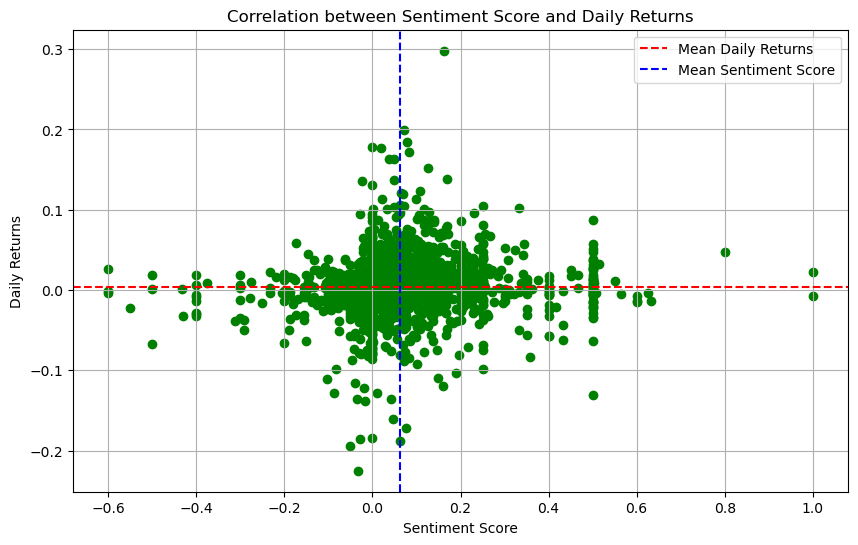

In [20]:
# Plotting
# Correlation between Sentiment Score and Daily Returns
plt.figure(figsize=(10, 6))
plt.scatter( merged_df['sentiment'], merged_df['Daily Returns'], color='green')
plt.title('Correlation between Sentiment Score and Daily Returns')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Returns')
plt.grid()
plt.axhline(merged_df['Daily Returns'].mean(), color='red', linestyle='--', label='Mean Daily Returns')
plt.axvline(merged_df['sentiment'].mean(), color='blue', linestyle='--', label='Mean Sentiment Score')
plt.legend()
plt.show()

In [10]:
merged_df.head()

,stock,sentiment,Close,Daily Returns
Date,,,,
2020-03-09,AAPL,-0.155556,66.542503,NaN
2020-03-10,AAPL,0.021708,71.334999,0.072022
2020-03-11,AAPL,0.018624,68.857498,-0.034731
2020-03-12,AAPL,-0.083048,62.057499,-0.098755
2020-03-13,AAPL,0.069215,69.492500,0.119808
